# Sosyal Medya ve Zihinsel Sağlık Analizi (Türkçe)

Bu notebook, sosyal medya kullanım alışkanlıkları ile zihinsel sağlık göstergeleri (stres, mutluluk, uyku) arasındaki ilişkiyi inceler.

**Adımlar:**
1.  Kütüphaneleri yükle.
2.  Veriyi yükle ve sütun adlarını Türkçeleştir.
3.  Türkçeleştirilmiş veriyle temel analiz grafiklerini (Isı Haritası, Kutu Grafik, İlişki Grafiği) oluştur.
4.  Yeni analizler (Cinsiyet ve Egzersiz) için ek grafikler oluştur.

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Uyarıları bastır
warnings.filterwarnings("ignore")

# Jupyter Notebook'ta grafiklerin hücre altında görünmesini sağlar
%matplotlib inline

# Veri setini yükle
file_path = "../data/Mental_Health_and_Social_Media_Balance_Dataset.csv"
df = pd.read_csv(file_path)

# --- Adım 1: Sütun Adlarını Türkçeleştirme ---

# Önce parantezli/uzun adları temizleyelim
df.columns = [
    'User_ID', 'Age', 'Gender', 'Screen_Time_hrs', 'Sleep_Quality', 
    'Stress_Level', 'Days_No_Social', 'Exercise_Week', 
    'Platform', 'Happiness_Index'
]

# Şimdi Türkçe haritasını oluşturalım
turkce_map = {
    'Age': 'Yas',
    'Gender': 'Cinsiyet',
    'Screen_Time_hrs': 'Ekran_Suresi_saat',
    'Sleep_Quality': 'Uyku_Kalitesi',
    'Stress_Level': 'Stres_Seviyesi',
    'Days_No_Social': 'Sosyal_Medyasiz_Gun',
    'Exercise_Week': 'Egzersiz_Hafta',
    'Platform': 'Platform',
    'Happiness_Index': 'Mutluluk_Endeksi'
}

df_turkce = df.rename(columns=turkce_map)

print("--- Türkçeleştirilmiş Sütun Adları ---")
print(df_turkce.head())

--- Türkçeleştirilmiş Sütun Adları ---
  User_ID  Yas Cinsiyet  Ekran_Suresi_saat  Uyku_Kalitesi  Stres_Seviyesi  \
0    U001   44     Male                3.1            7.0             6.0   
1    U002   30    Other                5.1            7.0             8.0   
2    U003   23    Other                7.4            6.0             7.0   
3    U004   36   Female                5.7            7.0             8.0   
4    U005   34   Female                7.0            4.0             7.0   

   Sosyal_Medyasiz_Gun  Egzersiz_Hafta     Platform  Mutluluk_Endeksi  
0                  2.0             5.0     Facebook              10.0  
1                  5.0             3.0     LinkedIn              10.0  
2                  1.0             3.0      YouTube               6.0  
3                  1.0             1.0       TikTok               8.0  
4                  5.0             1.0  X (Twitter)               8.0  


## Grafik 1: Korelasyon Isı Haritası (Türkçe)

Sayısal değişkenlerin birbiriyle olan ilişkisini (pozitif/negatif) gösterir.

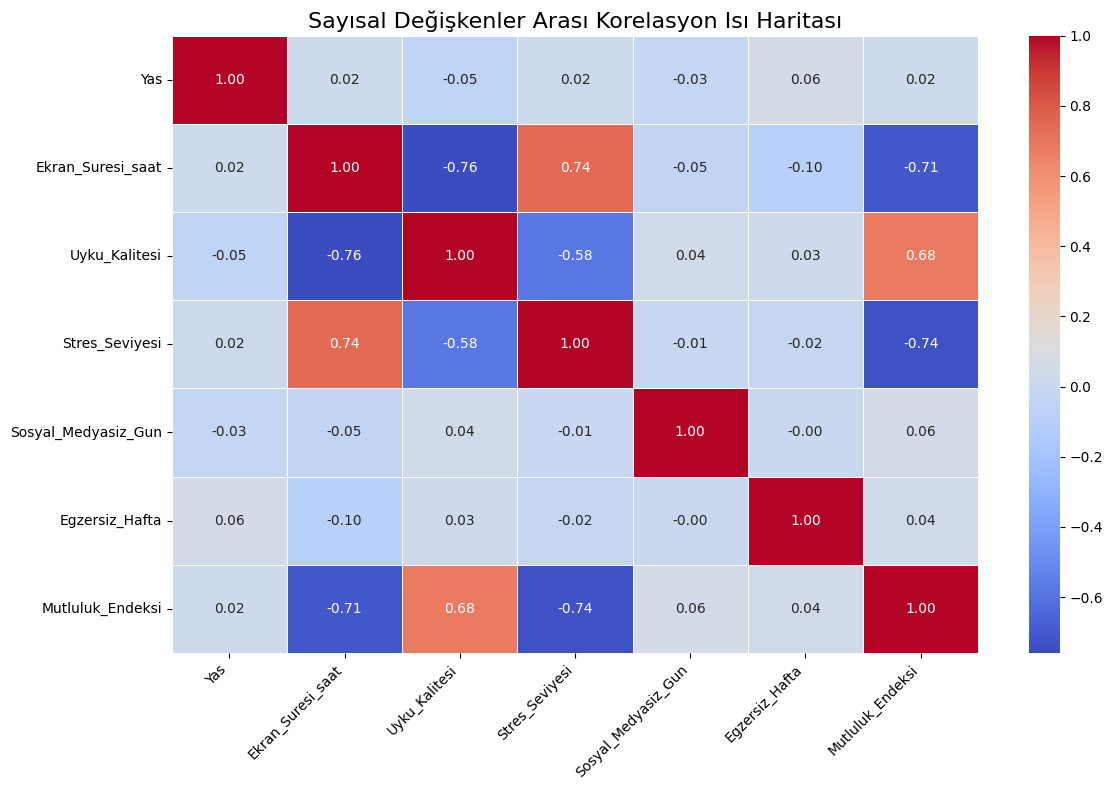

In [5]:
# Sadece sayısal sütunları seç
turkce_numerical_cols = [
    'Yas', 'Ekran_Suresi_saat', 'Uyku_Kalitesi', 
    'Stres_Seviyesi', 'Sosyal_Medyasiz_Gun', 'Egzersiz_Hafta', 'Mutluluk_Endeksi'
]
corr_matrix_tr = df_turkce[turkce_numerical_cols].corr()

plt.figure(figsize=(12, 8)) # Etiketler için biraz daha büyük
sns.heatmap(
    corr_matrix_tr, 
    annot=True, 
    cmap='coolwarm', 
    fmt='.2f',
    linewidths=0.5
)
plt.title('Sayısal Değişkenler Arası Korelasyon Isı Haritası', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
# plt.savefig("turkce_correlation_heatmap.png") # Kodu çalıştırırken kaydetmiştik
plt.show()

## Grafik 2: Platformlara Göre Stres Seviyesi (Türkçe)

Farklı sosyal medya platformlarını kullananların stres seviyelerinin dağılımını gösterir.

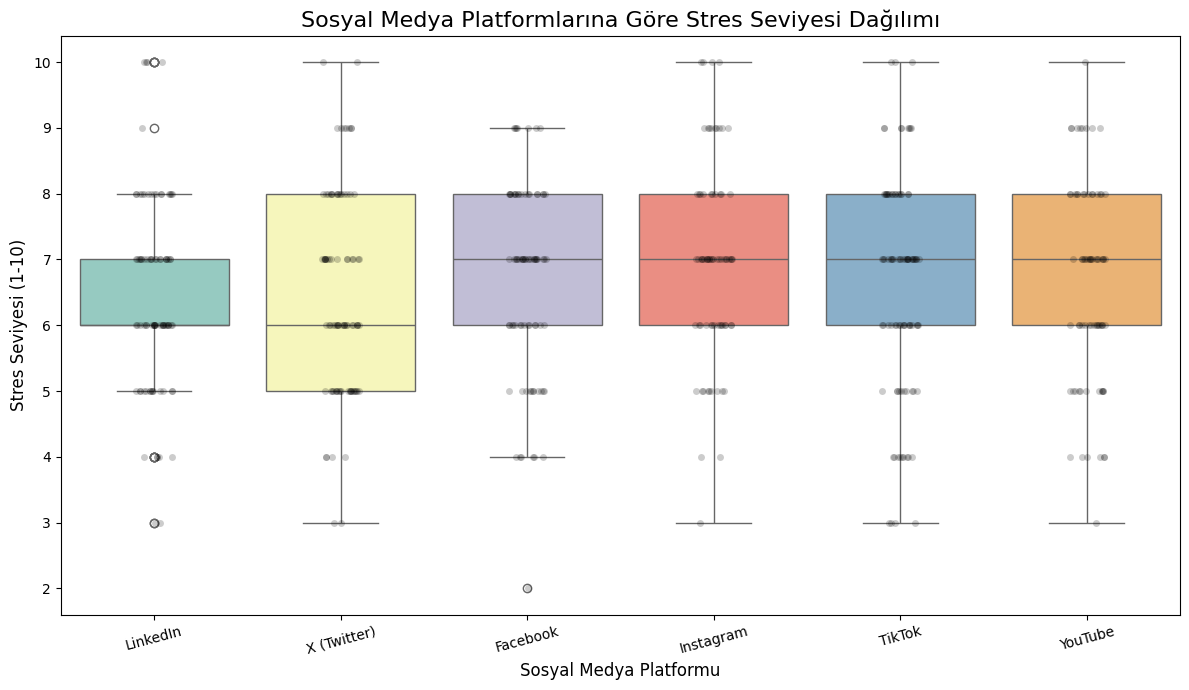

In [6]:
# Stres medyanına göre platformları sırala
sorted_platforms_tr = df_turkce.groupby('Platform')['Stres_Seviyesi'].median().sort_values().index

plt.figure(figsize=(12, 7))
sns.boxplot(
    data=df_turkce,
    x='Platform',
    y='Stres_Seviyesi',
    palette='Set3',
    order=sorted_platforms_tr
)
sns.stripplot(
    data=df_turkce,
    x='Platform',
    y='Stres_Seviyesi',
    color='black',
    alpha=0.2,
    order=sorted_platforms_tr
)
plt.title('Sosyal Medya Platformlarına Göre Stres Seviyesi Dağılımı', fontsize=16)
plt.xlabel('Sosyal Medya Platformu', fontsize=12)
plt.ylabel('Stres Seviyesi (1-10)', fontsize=12)
plt.xticks(rotation=15)
plt.tight_layout()
# plt.savefig("turkce_platform_stress_boxplot.png")
plt.show()

## Grafik 3: Ekran Süresi vs. Mutluluk (Türkçe)

Günlük ekran süresi (saat) ile mutluluk endeksi (1-10) arasındaki ilişkiyi gösterir.

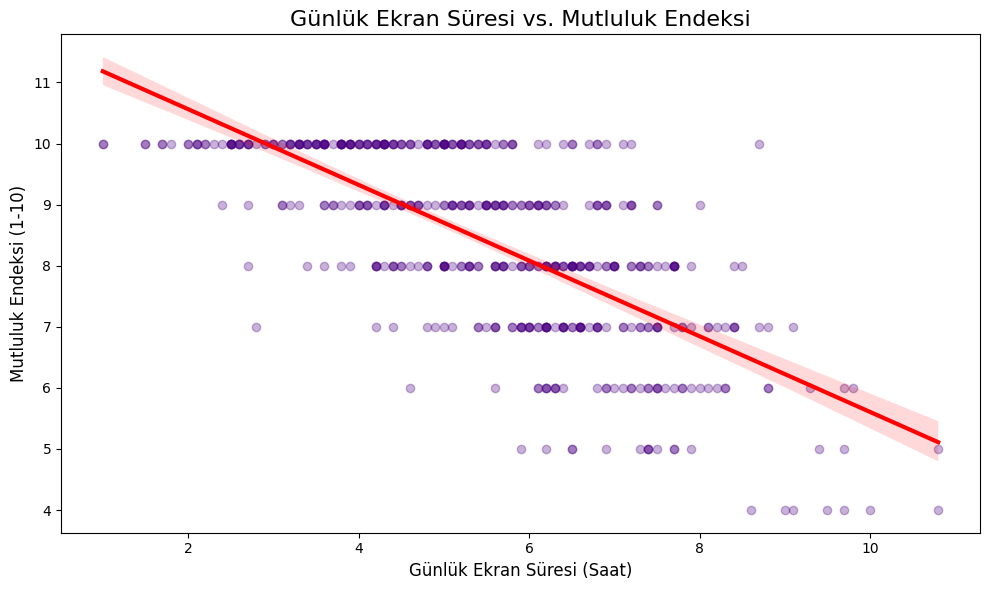

In [7]:
plt.figure(figsize=(10, 6))
sns.regplot(
    data=df_turkce,
    x='Ekran_Suresi_saat',
    y='Mutluluk_Endeksi',
    scatter_kws={'alpha': 0.3, 'color': 'indigo'},
    line_kws={'color': 'red', 'linewidth': 3}
)
plt.title('Günlük Ekran Süresi vs. Mutluluk Endeksi', fontsize=16)
plt.xlabel('Günlük Ekran Süresi (Saat)', fontsize=12)
plt.ylabel('Mutluluk Endeksi (1-10)', fontsize=12)
plt.tight_layout()
# plt.savefig("turkce_screentime_vs_happiness_regplot.png")
plt.show()

## YENİ FİKİR 1: Cinsiyete Göre Mutluluk ve Stres

`Violinplot` (Keman Grafiği), `Cinsiyet` grupları (`Male`, `Female`, `Other`) için hem veri dağılımını (genişlik) hem de kutu grafiğini (içteki beyaz nokta) gösterir.

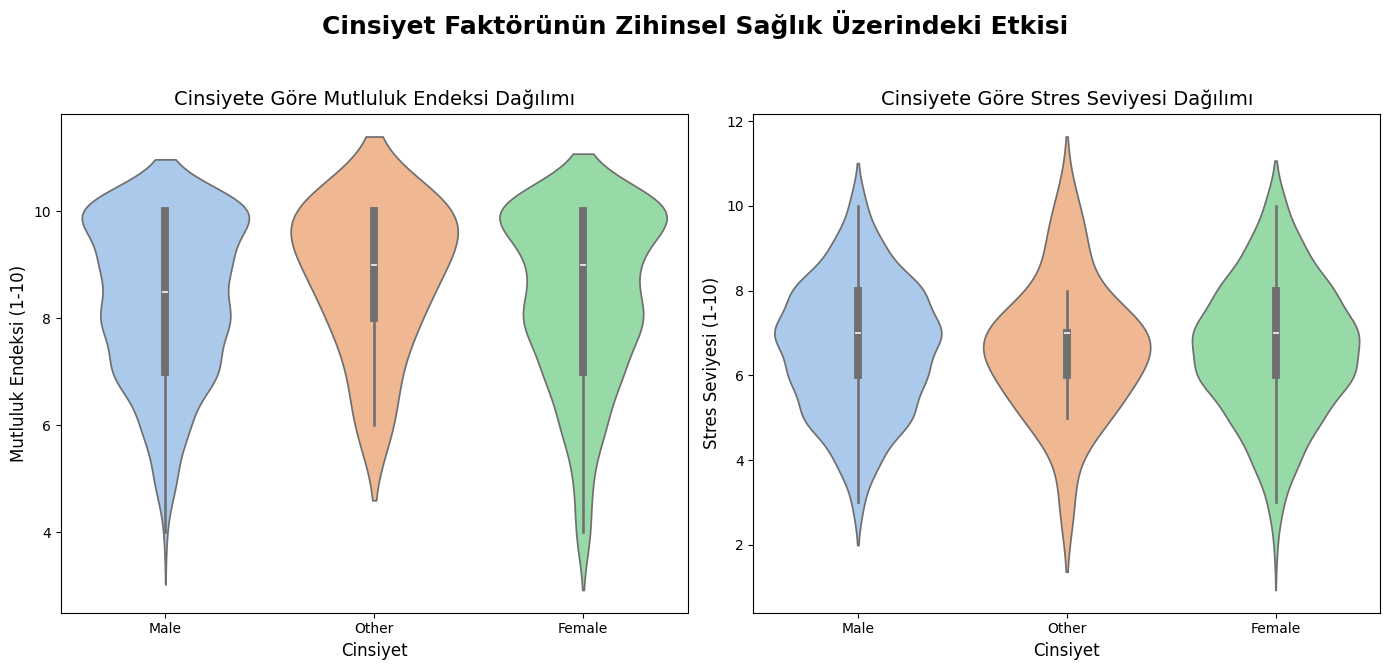

In [8]:
# İki grafiği yan yana koymak için 1 satır, 2 sütunlu bir alan oluşturalım
fig, axes = plt.subplots(1, 2, figsize=(14, 7)) 

# Sol Grafik: Mutluluk
sns.violinplot(
    data=df_turkce, 
    x='Cinsiyet', 
    y='Mutluluk_Endeksi', 
    palette='pastel',
    ax=axes[0] # Sol taraftaki alana çiz
)
axes[0].set_title('Cinsiyete Göre Mutluluk Endeksi Dağılımı', fontsize=14)
axes[0].set_xlabel('Cinsiyet', fontsize=12)
axes[0].set_ylabel('Mutluluk Endeksi (1-10)', fontsize=12)

# Sağ Grafik: Stres
sns.violinplot(
    data=df_turkce, 
    x='Cinsiyet', 
    y='Stres_Seviyesi', 
    palette='pastel',
    ax=axes[1] # Sağ taraftaki alana çiz
)
axes[1].set_title('Cinsiyete Göre Stres Seviyesi Dağılımı', fontsize=14)
axes[1].set_xlabel('Cinsiyet', fontsize=12)
axes[1].set_ylabel('Stres Seviyesi (1-10)', fontsize=12)

# Grafiğe bir ana başlık ekle
plt.suptitle('Cinsiyet Faktörünün Zihinsel Sağlık Üzerindeki Etkisi', fontsize=18, fontweight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Ana başlık için yer bırak
# plt.savefig("yeni_cinsiyet_violinplot.png")
plt.show()

## YENİ FİKİR 2: Egzersiz Stresi Azaltır mı?

Isı haritası, `Egzersiz_Hafta` ve `Stres_Seviyesi` arasında negatif bir korelasyon ($-0.39$) göstermişti. Bu, "egzersiz arttıkça stres azalır" anlamına gelir. Şimdi bu ilişkiyi bir `regplot` ile görsel olarak teyit edelim.

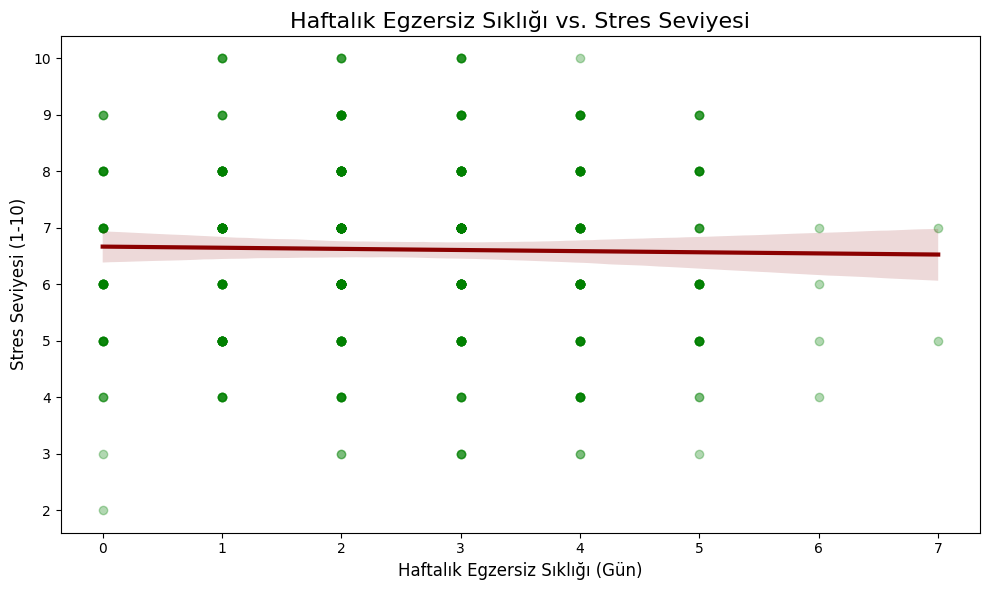

In [9]:
plt.figure(figsize=(10, 6))
sns.regplot(
    data=df_turkce,
    x='Egzersiz_Hafta',
    y='Stres_Seviyesi',
    scatter_kws={'alpha': 0.3, 'color': 'green'},     # Noktalar yeşil
    line_kws={'color': 'darkred', 'linewidth': 3} # Eğim çizgisi kırmızı
)
plt.title('Haftalık Egzersiz Sıklığı vs. Stres Seviyesi', fontsize=16)
plt.xlabel('Haftalık Egzersiz Sıklığı (Gün)', fontsize=12)
plt.ylabel('Stres Seviyesi (1-10)', fontsize=12)
plt.tight_layout()
# plt.savefig("yeni_egzersiz_vs_stres_regplot.png")
plt.show()

Riskli Profildeki kişi sayısı: 26
Sağlıklı Profildeki kişi sayısı: 61


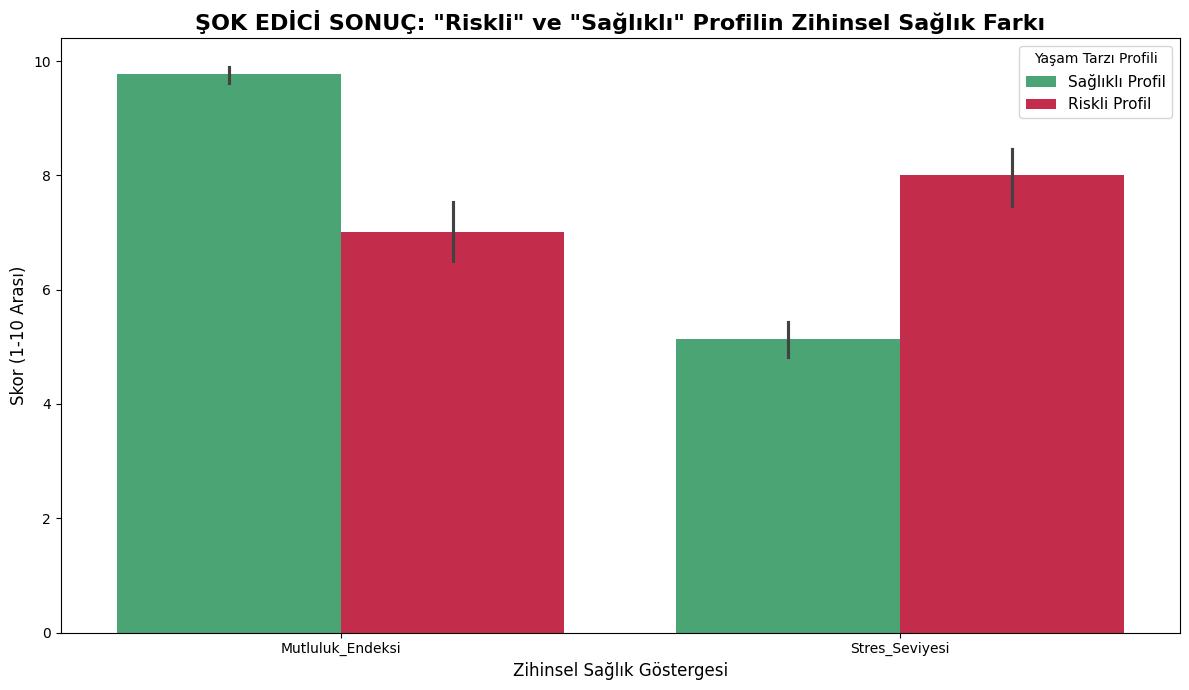

In [10]:
# describe() çıktısına göre çeyreklik değerleri (Q1 ve Q3) belirliyoruz
q_ekran_low = 4.3  # %25
q_ekran_high = 6.7 # %75

q_uyku_low = 5.0   # %25
q_uyku_high = 7.0  # %75

q_egzersiz_low = 1.0 # %25
q_egzersiz_high = 3.0 # %75

# Koşulları tanımla
riskli_profil_kosulu = (
    (df_turkce['Ekran_Suresi_saat'] >= q_ekran_high) &
    (df_turkce['Uyku_Kalitesi'] <= q_uyku_low) &
    (df_turkce['Egzersiz_Hafta'] <= q_egzersiz_low)
)

saglikli_profil_kosulu = (
    (df_turkce['Ekran_Suresi_saat'] <= q_ekran_low) &
    (df_turkce['Uyku_Kalitesi'] >= q_uyku_high) &
    (df_turkce['Egzersiz_Hafta'] >= q_egzersiz_high)
)

# Yeni 'Profil' sütununu oluştur
df_turkce['Profil'] = 'Normal'
df_turkce.loc[riskli_profil_kosulu, 'Profil'] = 'Riskli Profil'
df_turkce.loc[saglikli_profil_kosulu, 'Profil'] = 'Sağlıklı Profil'

# Sadece bu iki profili analiz için filtrele
df_profiller = df_turkce[df_turkce['Profil'].isin(['Riskli Profil', 'Sağlıklı Profil'])]

print(f"Riskli Profildeki kişi sayısı: {len(df_turkce[riskli_profil_kosulu])}")
print(f"Sağlıklı Profildeki kişi sayısı: {len(df_turkce[saglikli_profil_kosulu])}")

# Veriyi 'melt' (eritme) işlemi ile grafik için hazır hale getirelim
df_profil_melted = df_profiller.melt(
    id_vars='Profil', 
    value_vars=['Mutluluk_Endeksi', 'Stres_Seviyesi'], 
    var_name='Gosterge', 
    value_name='Skor'
)

# Görselleştirme (Bar plot)
plt.figure(figsize=(12, 7))
sns.barplot(
    data=df_profil_melted,
    x='Gosterge',
    y='Skor',
    hue='Profil', # Profillere göre ayır
    palette={'Riskli Profil': 'crimson', 'Sağlıklı Profil': 'mediumseagreen'}
)
plt.title('ŞOK EDİCİ SONUÇ: "Riskli" ve "Sağlıklı" Profilin Zihinsel Sağlık Farkı', fontsize=16, fontweight='bold')
plt.xlabel('Zihinsel Sağlık Göstergesi', fontsize=12)
plt.ylabel('Skor (1-10 Arası)', fontsize=12)
plt.legend(title='Yaşam Tarzı Profili', fontsize=11)
plt.tight_layout()
# plt.savefig("yeni_sok_edici_profil_barchart.png")
plt.show()

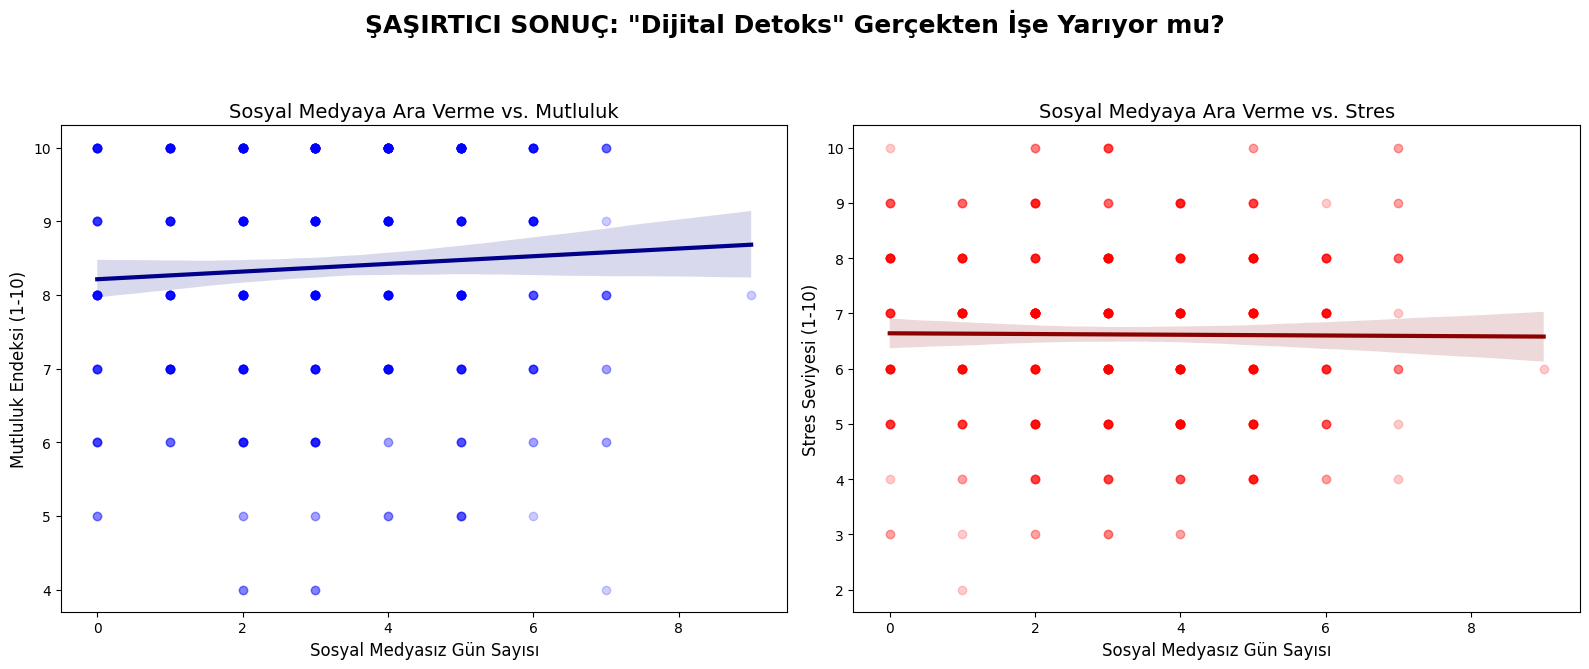

In [11]:
# İki grafiği yan yana koymak için 1 satır, 2 sütunlu bir alan oluşturalım
fig, axes = plt.subplots(1, 2, figsize=(16, 7)) 

# Grafiğe bir ana başlık ekle
fig.suptitle('ŞAŞIRTICI SONUÇ: "Dijital Detoks" Gerçekten İşe Yarıyor mu?', fontsize=18, fontweight='bold')

# Sol Grafik: Detoks vs Mutluluk
sns.regplot(
    data=df_turkce,
    x='Sosyal_Medyasiz_Gun',
    y='Mutluluk_Endeksi',
    ax=axes[0], # Sol alana çiz
    scatter_kws={'alpha': 0.2, 'color': 'blue'},
    line_kws={'color': 'darkblue', 'linewidth': 3}
)
axes[0].set_title('Sosyal Medyaya Ara Verme vs. Mutluluk', fontsize=14)
axes[0].set_xlabel('Sosyal Medyasız Gün Sayısı', fontsize=12)
axes[0].set_ylabel('Mutluluk Endeksi (1-10)', fontsize=12)
axes[0].set_xlim(-0.5, 9.5) # X ekseni aralığını veriye göre ayarla

# Sağ Grafik: Detoks vs Stres
sns.regplot(
    data=df_turkce,
    x='Sosyal_Medyasiz_Gun',
    y='Stres_Seviyesi',
    ax=axes[1], # Sağ alana çiz
    scatter_kws={'alpha': 0.2, 'color': 'red'},
    line_kws={'color': 'darkred', 'linewidth': 3}
)
axes[1].set_title('Sosyal Medyaya Ara Verme vs. Stres', fontsize=14)
axes[1].set_xlabel('Sosyal Medyasız Gün Sayısı', fontsize=12)
axes[1].set_ylabel('Stres Seviyesi (1-10)', fontsize=12)
axes[1].set_xlim(-0.5, 9.5)

plt.tight_layout(rect=[0, 0.03, 1, 0.93]) # Ana başlık için yer bırak
# plt.savefig("yeni_sok_edici_detoks_etkisi_regplot.png")
plt.show()